In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import linear_model

### Data Loading

In [2]:
names =['country','yr','age','sex','alcohol','drunkard','obese','drug','parents_fights','bunk','had_sex','smoker','had_fights','bullied','accident','alone','suicide']
dataset = pd.read_csv(r"C:\Users\deept\OneDrive\Desktop\GHSH_Pooled_Data1.csv",names = names,skiprows=1)

### Understanding data

#### Data understanding is the knowledge that you have about the data, the needs that the data will satisfy, its content and location. To be clear, it is much more than current location and a definition of what a data element means in situ within an application or data base.

In [3]:
dataset.shape

(106, 17)

In [4]:
dataset.describe()

,yr,alcohol,drunkard,obese,drug,parents_fights,bunk,had_sex,smoker,had_fights,bullied,accident,alone,suicide
count,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,104.000000,106.000000,102.000000,106.000000,106.000000,106.000000
mean,2014.698113,31.815094,22.496226,23.694340,7.642453,33.190566,29.996226,26.679245,15.546154,32.448113,31.109804,43.723679,7.744340,14.452830
std,2.089292,53.454089,16.553129,15.764075,8.713536,11.559408,10.786728,17.401318,10.748501,15.297701,14.185479,14.808421,4.365254,9.273621
min,2010.000000,1.400000,0.800000,3.300000,0.000000,5.600000,6.500000,2.500000,1.200000,3.500000,9.900000,15.200000,1.500000,2.700000
25%,2013.000000,11.550000,9.000000,11.400000,2.025000,25.825000,22.450000,12.600000,7.050000,20.750000,21.775000,34.800000,4.500000,9.400000
50%,2015.000000,26.000000,19.650000,21.800000,4.350000,33.400000,28.950000,22.350000,12.600000,29.650000,27.550000,41.400000,6.950000,11.850000
75%,2016.000000,42.350000,30.475000,31.850000,9.575000,40.850000,36.825000,37.100000,22.000000,42.700000,41.150000,53.150000,9.700000,18.425000
max,2018.000000,548.000000,80.200000,70.600000,43.200000,63.900000,62.200000,73.900000,43.800000,76.500000,78.600000,87.700000,24.800000,67.200000


In [5]:
dataset.head()

,country,yr,age,sex,alcohol,drunkard,obese,drug,parents_fights,bunk,had_sex,smoker,had_fights,bullied,accident,alone,suicide
0,Argentina,2018,13-15,Female,50.3,30.7,27.8,7.9,41.5,24.7,25.7,16.8,17.2,NaN,27.5,4.8,19.9
1,Argentina,2018,13-15,Male,44.9,26.1,39.1,8.4,44.5,27.9,38.4,12.1,33.2,NaN,37.4,5.5,10.4
2,Argentina,2018,16-17,Female,67.2,56.3,22.5,21.9,37.1,34.0,59.1,28.5,15.1,NaN,30.1,6.3,17.4
3,Argentina,2018,16-17,Male,68.1,55.8,27.9,27.0,39.8,39.4,68.6,28.0,33.6,NaN,40.3,6.6,11.2
4,Argentina,2012,13-15,Male,49.3,28.9,35.9,10.6,46.2,32.0,43.5,17.0,44.2,42.1,24.8,6.1,12.9


In [6]:
dataset.tail()

,country,yr,age,sex,alcohol,drunkard,obese,drug,parents_fights,bunk,had_sex,smoker,had_fights,bullied,accident,alone,suicide
101,Vanuatu,2011,13-15,Female,5.8,4.7,13.6,1.9,20.2,44.6,8.4,8.2,41.8,66.5,57.4,14.3,19.5
102,Wallis and Futuna,2015,13-15,Male,32.2,35.5,60.5,4.0,36.3,32.7,32.0,25.7,48.7,30.2,51.2,4.1,14.7
103,Wallis and Futuna,2015,13-15,Female,24.4,27.1,63.0,2.0,36.3,16.2,13.6,29.9,22.9,30.9,41.7,3.3,16.9
104,Wallis and Futuna,2015,16-17,Male,48.3,53.7,57.8,10.1,36.5,38.9,55.7,40.0,49.6,23.6,54.5,7.3,9.0
105,Wallis and Futuna,2015,16-17,Female,42.9,51.7,70.6,3.9,37.8,37.2,22.4,41.7,17.3,29.4,30.4,1.5,16.2


### Data Cleansing / Preprocessing

#### Data cleansing or data cleaning is the process of detecting and correcting corrupt or inaccurate records from a record set, table, or database and refers to identifying incomplete, incorrect, inaccurate or irrelevant parts of the data and then replacing, modifying, or deleting the dirty or coarse data.

In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106 entries, 0 to 105
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   country         106 non-null    object 
 1   yr              106 non-null    int64  
 2   age             106 non-null    object 
 3   sex             106 non-null    object 
 4   alcohol         106 non-null    float64
 5   drunkard        106 non-null    float64
 6   obese           106 non-null    float64
 7   drug            106 non-null    float64
 8   parents_fights  106 non-null    float64
 9   bunk            106 non-null    float64
 10  had_sex         106 non-null    float64
 11  smoker          104 non-null    float64
 12  had_fights      106 non-null    float64
 13  bullied         102 non-null    float64
 14  accident        106 non-null    float64
 15  alone           106 non-null    float64
 16  suicide         106 non-null    float64
dtypes: float64(13), int64(1), object(3)

In [8]:
dataset.isnull().sum()

country           0
yr                0
age               0
sex               0
alcohol           0
drunkard          0
obese             0
drug              0
parents_fights    0
bunk              0
had_sex           0
smoker            2
had_fights        0
bullied           4
accident          0
alone             0
suicide           0
dtype: int64

<AxesSubplot:>

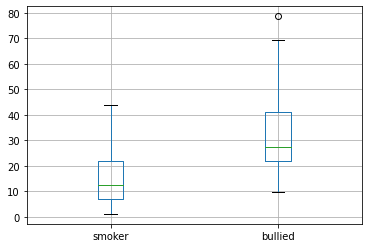

In [9]:
bp = dataset.boxplot(column=['smoker', 'bullied'])  # Visually showing Null values
bp

In [10]:
dataset = dataset.dropna()   # dropping null values

In [11]:
dataset.isnull().sum()

country           0
yr                0
age               0
sex               0
alcohol           0
drunkard          0
obese             0
drug              0
parents_fights    0
bunk              0
had_sex           0
smoker            0
had_fights        0
bullied           0
accident          0
alone             0
suicide           0
dtype: int64

### Data Preparing

In [12]:
dataset.replace("Male",0,inplace=True)
dataset.replace("Female",1,inplace=True)
dataset.replace("13-15",0,inplace=True)
dataset.replace("16-17",1,inplace=True)

In [13]:
dataset

,country,yr,age,sex,alcohol,drunkard,obese,drug,parents_fights,bunk,had_sex,smoker,had_fights,bullied,accident,alone,suicide
4,Argentina,2012,0,0,49.3,28.9,35.9,10.6,46.2,32.0,43.5,17.0,44.2,42.1,24.8,6.1,12.9
5,Argentina,2012,0,1,50.7,26.8,21.8,6.5,49.9,29.4,30.7,20.5,24.7,25.2,24.2,4.3,18.9
8,Benin,2016,0,0,38.0,19.3,12.7,0.8,35.7,18.8,31.8,5.1,32.1,47.4,48.4,10.8,14.4
9,Benin,2016,0,1,42.4,16.8,18.3,0.2,39.7,6.5,14.2,1.3,27.3,51.5,40.4,14.2,9.6
10,Benin,2016,1,0,46.5,29.6,3.3,2.1,33.3,17.3,35.7,6.9,28.8,43.3,51.0,9.7,13.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101,Vanuatu,2011,0,1,5.8,4.7,13.6,1.9,20.2,44.6,8.4,8.2,41.8,66.5,57.4,14.3,19.5
102,Wallis and Futuna,2015,0,0,32.2,35.5,60.5,4.0,36.3,32.7,32.0,25.7,48.7,30.2,51.2,4.1,14.7
103,Wallis and Futuna,2015,0,1,24.4,27.1,63.0,2.0,36.3,16.2,13.6,29.9,22.9,30.9,41.7,3.3,16.9
104,Wallis and Futuna,2015,1,0,48.3,53.7,57.8,10.1,36.5,38.9,55.7,40.0,49.6,23.6,54.5,7.3,9.0


In [14]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 4 to 105
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   country         100 non-null    object 
 1   yr              100 non-null    int64  
 2   age             100 non-null    int64  
 3   sex             100 non-null    int64  
 4   alcohol         100 non-null    float64
 5   drunkard        100 non-null    float64
 6   obese           100 non-null    float64
 7   drug            100 non-null    float64
 8   parents_fights  100 non-null    float64
 9   bunk            100 non-null    float64
 10  had_sex         100 non-null    float64
 11  smoker          100 non-null    float64
 12  had_fights      100 non-null    float64
 13  bullied         100 non-null    float64
 14  accident        100 non-null    float64
 15  alone           100 non-null    float64
 16  suicide         100 non-null    float64
dtypes: float64(13), int64(3), object(1)

In [15]:
dataset.head()

,country,yr,age,sex,alcohol,drunkard,obese,drug,parents_fights,bunk,had_sex,smoker,had_fights,bullied,accident,alone,suicide
4,Argentina,2012,0,0,49.3,28.9,35.9,10.6,46.2,32.0,43.5,17.0,44.2,42.1,24.8,6.1,12.9
5,Argentina,2012,0,1,50.7,26.8,21.8,6.5,49.9,29.4,30.7,20.5,24.7,25.2,24.2,4.3,18.9
8,Benin,2016,0,0,38.0,19.3,12.7,0.8,35.7,18.8,31.8,5.1,32.1,47.4,48.4,10.8,14.4
9,Benin,2016,0,1,42.4,16.8,18.3,0.2,39.7,6.5,14.2,1.3,27.3,51.5,40.4,14.2,9.6
10,Benin,2016,1,0,46.5,29.6,3.3,2.1,33.3,17.3,35.7,6.9,28.8,43.3,51.0,9.7,13.4


In [16]:
dataset = dataset.reset_index(drop=True)
dataset.head()

,country,yr,age,sex,alcohol,drunkard,obese,drug,parents_fights,bunk,had_sex,smoker,had_fights,bullied,accident,alone,suicide
0,Argentina,2012,0,0,49.3,28.9,35.9,10.6,46.2,32.0,43.5,17.0,44.2,42.1,24.8,6.1,12.9
1,Argentina,2012,0,1,50.7,26.8,21.8,6.5,49.9,29.4,30.7,20.5,24.7,25.2,24.2,4.3,18.9
2,Benin,2016,0,0,38.0,19.3,12.7,0.8,35.7,18.8,31.8,5.1,32.1,47.4,48.4,10.8,14.4
3,Benin,2016,0,1,42.4,16.8,18.3,0.2,39.7,6.5,14.2,1.3,27.3,51.5,40.4,14.2,9.6
4,Benin,2016,1,0,46.5,29.6,3.3,2.1,33.3,17.3,35.7,6.9,28.8,43.3,51.0,9.7,13.4


In [17]:
dataset.describe()

,yr,age,sex,alcohol,drunkard,obese,drug,parents_fights,bunk,had_sex,smoker,had_fights,bullied,accident,alone,suicide
count,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,2014.640000,0.420000,0.500000,30.85900,20.575000,23.229000,7.219000,32.624000,30.273000,25.898000,15.314000,32.680000,31.118000,44.092100,7.826000,14.473000
std,1.977244,0.496045,0.502519,54.75516,14.091694,16.045008,8.594251,11.627641,10.778185,16.989123,10.804919,15.543578,14.327817,15.067355,4.474227,9.506657
min,2010.000000,0.000000,0.000000,1.40000,0.800000,3.300000,0.000000,5.600000,6.500000,2.500000,1.200000,3.500000,9.900000,15.200000,1.500000,2.700000
25%,2013.000000,0.000000,0.000000,10.22500,8.350000,11.275000,1.900000,25.300000,22.750000,12.200000,6.875000,21.250000,21.575000,34.800000,4.375000,9.150000
50%,2015.000000,0.000000,0.500000,23.80000,18.200000,21.000000,4.100000,32.400000,29.200000,21.900000,12.350000,29.400000,26.850000,42.700000,7.050000,11.850000
75%,2016.000000,1.000000,1.000000,40.60000,29.050000,30.200000,8.750000,39.825000,36.900000,36.500000,21.600000,42.875000,41.650000,53.350000,10.000000,18.675000
max,2017.000000,1.000000,1.000000,548.00000,55.300000,70.600000,43.200000,63.900000,62.200000,73.900000,43.800000,76.500000,78.600000,87.700000,24.800000,67.200000


### Removing data redundancy

In [18]:
dataset.columns.duplicated()

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False])

### Data Analysis and Visualization

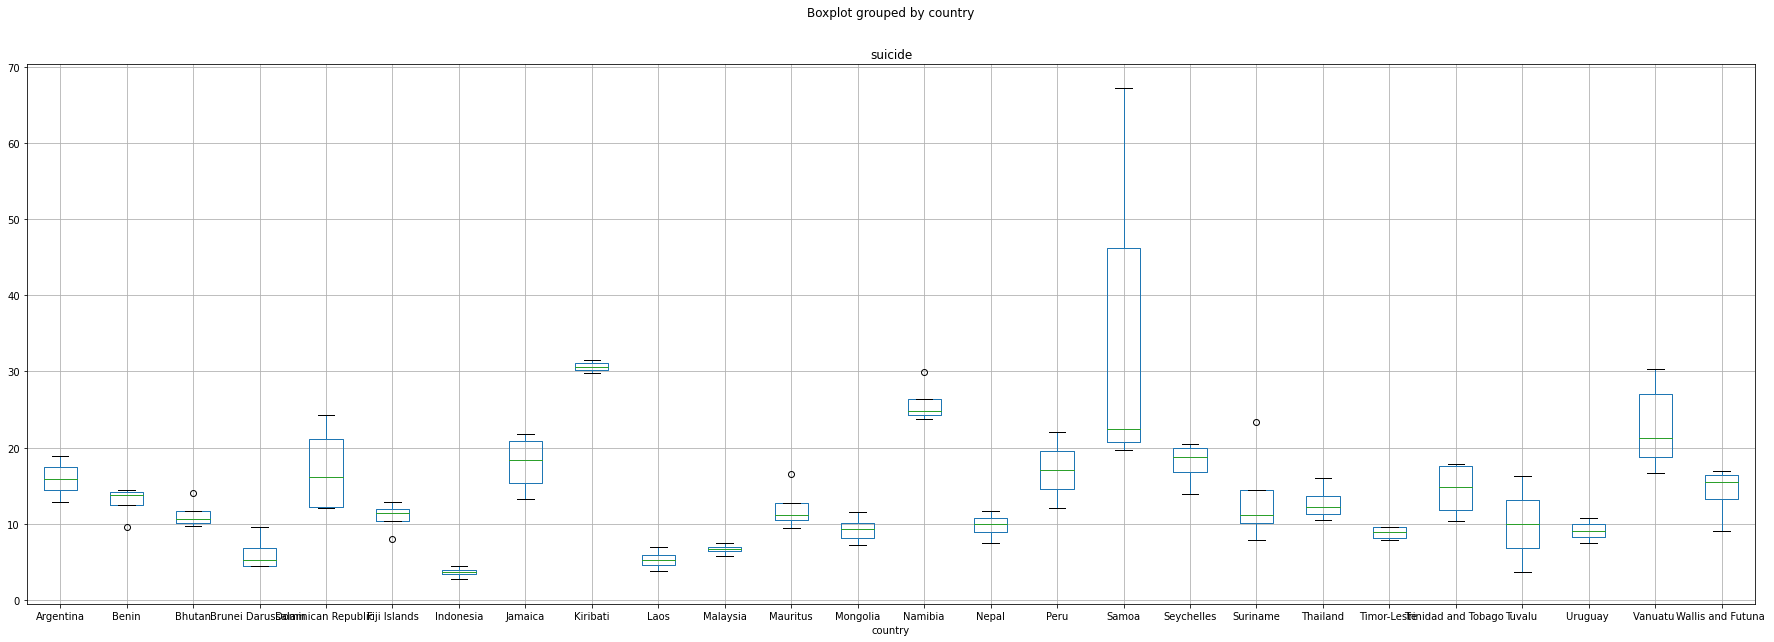

In [54]:
dataset_num = dataset.select_dtypes(include=object)
for col in dataset_num.columns:
    dataset.boxplot(column = 'suicide', by = col,figsize=(30,10))

#### Univariate Analysis

In [19]:
dataset.dtypes

country            object
yr                  int64
age                 int64
sex                 int64
alcohol           float64
drunkard          float64
obese             float64
drug              float64
parents_fights    float64
bunk              float64
had_sex           float64
smoker            float64
had_fights        float64
bullied           float64
accident          float64
alone             float64
suicide           float64
dtype: object

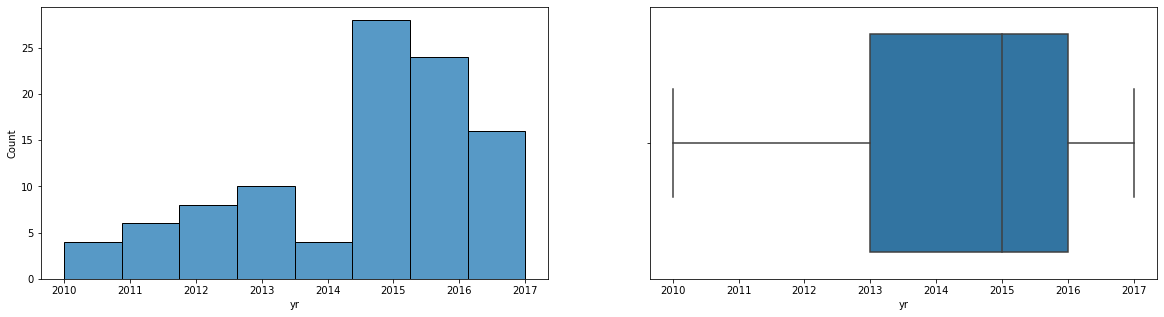

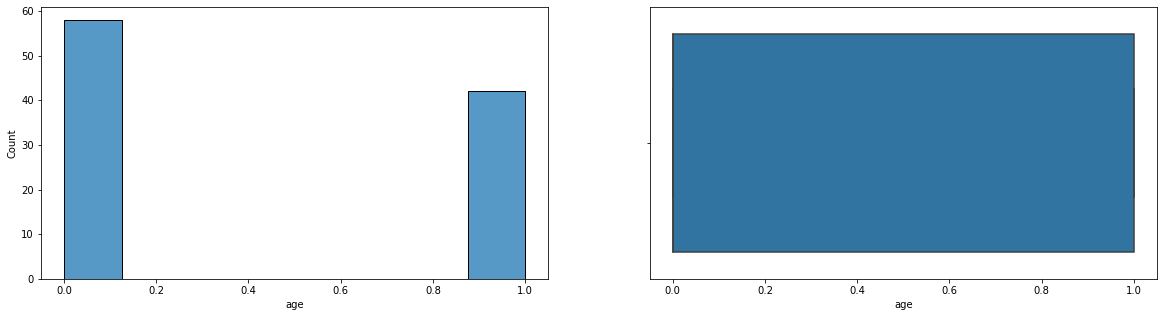

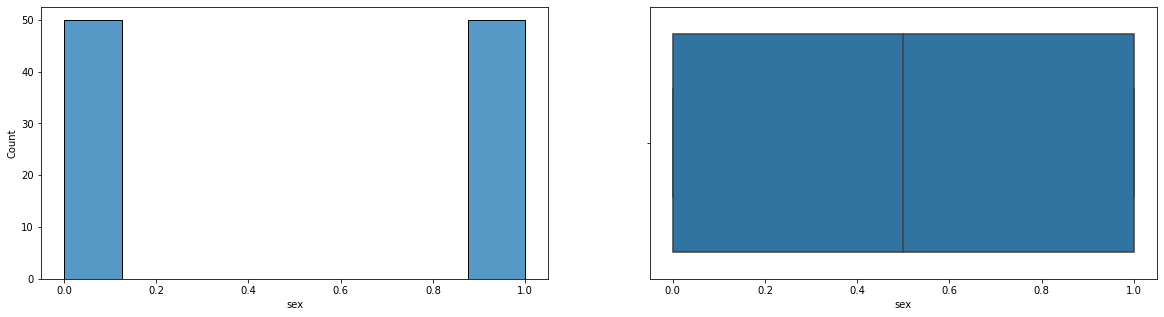

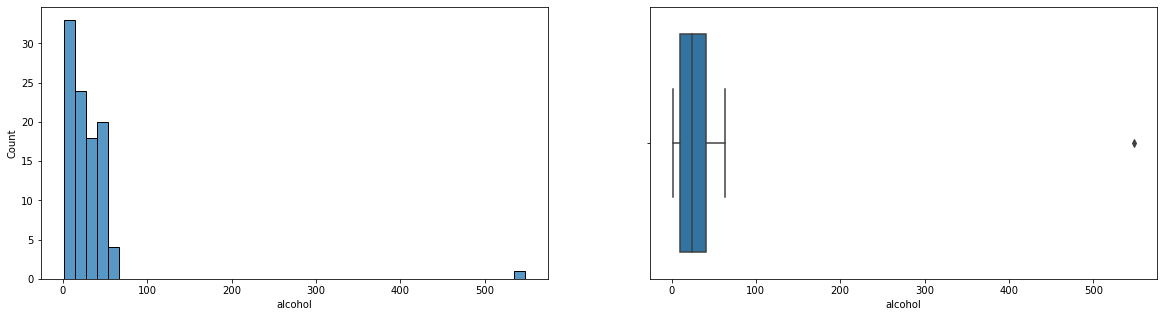

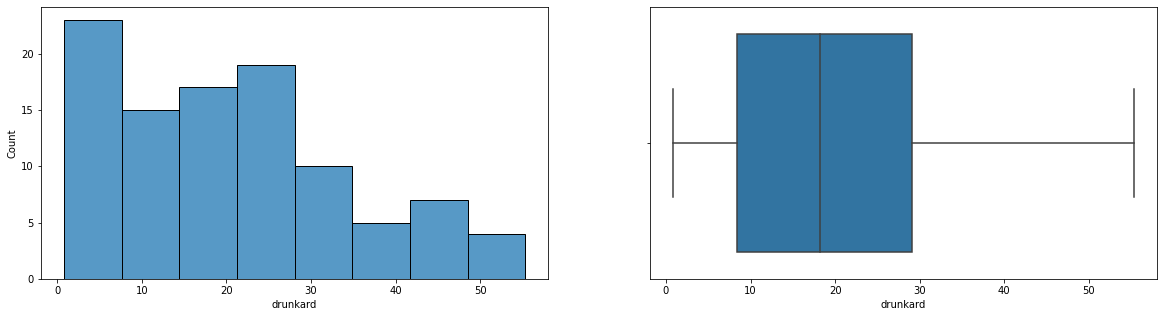

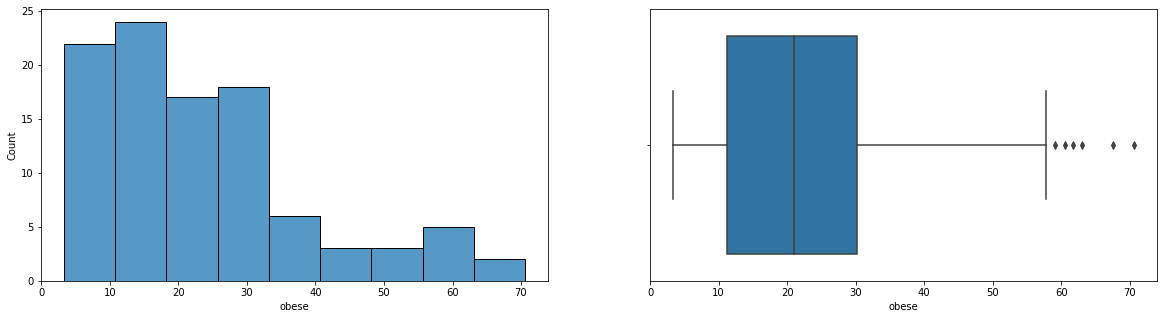

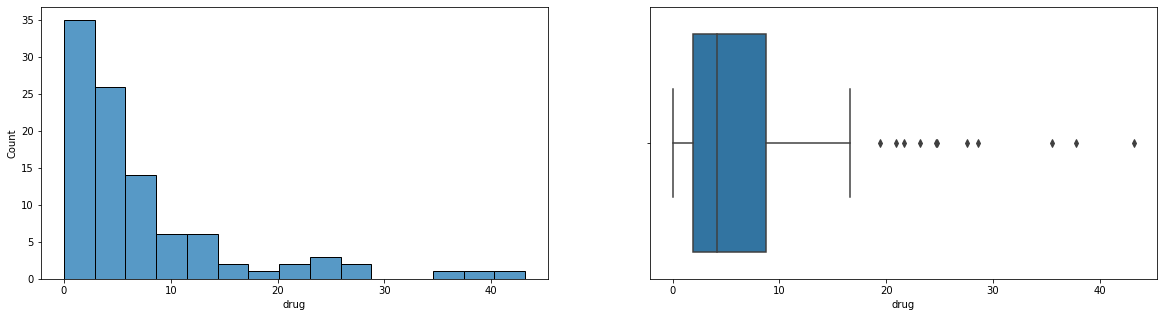

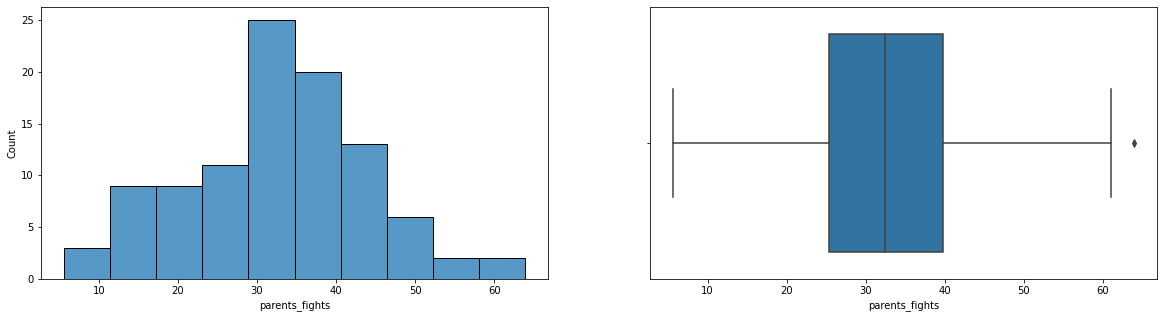

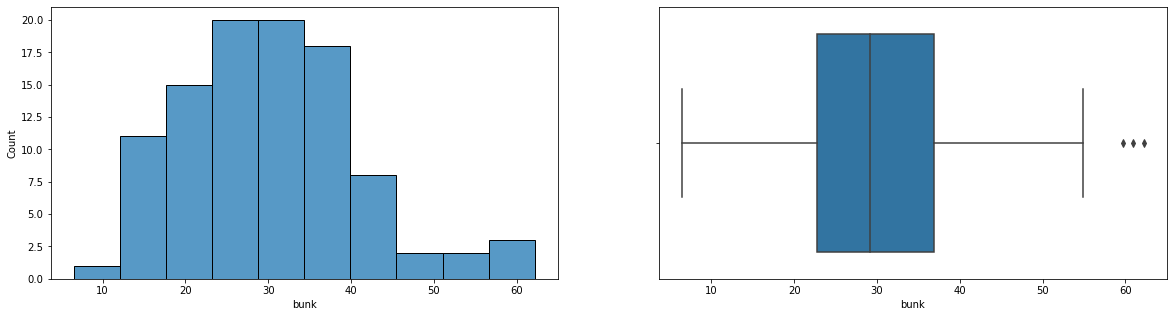

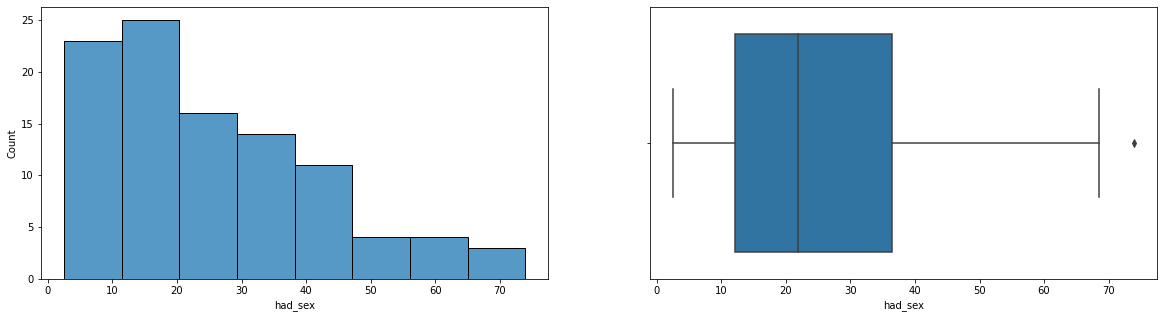

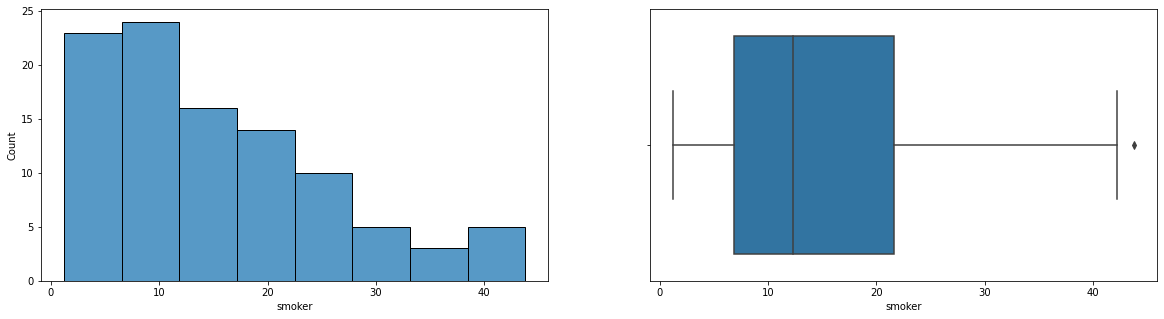

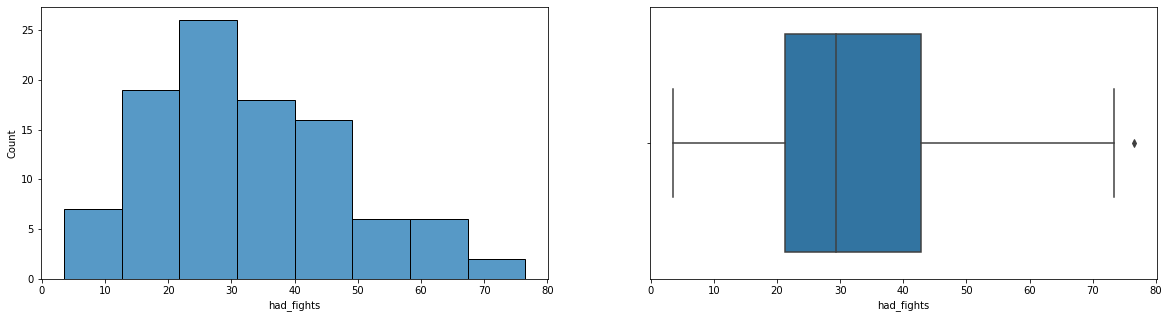

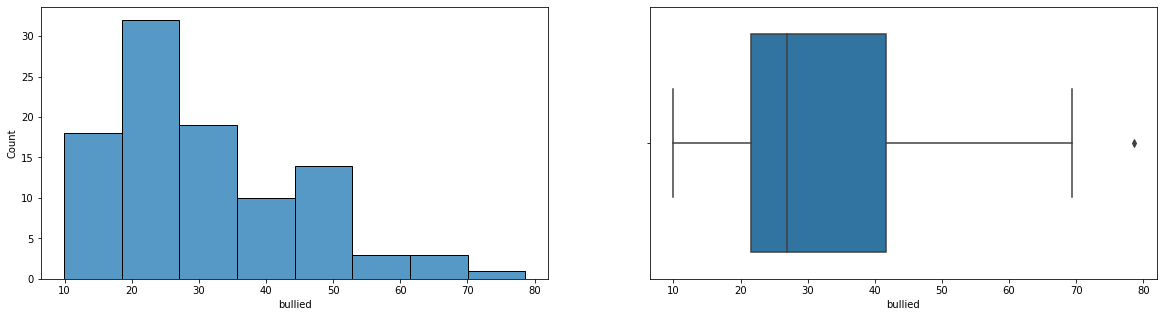

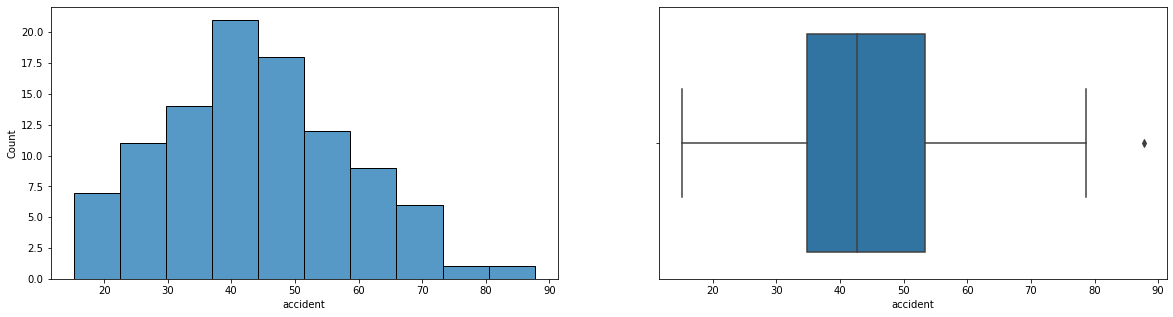

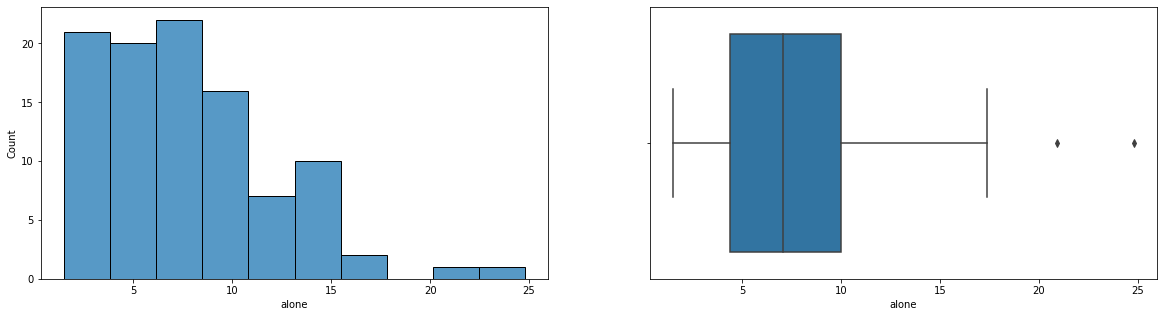

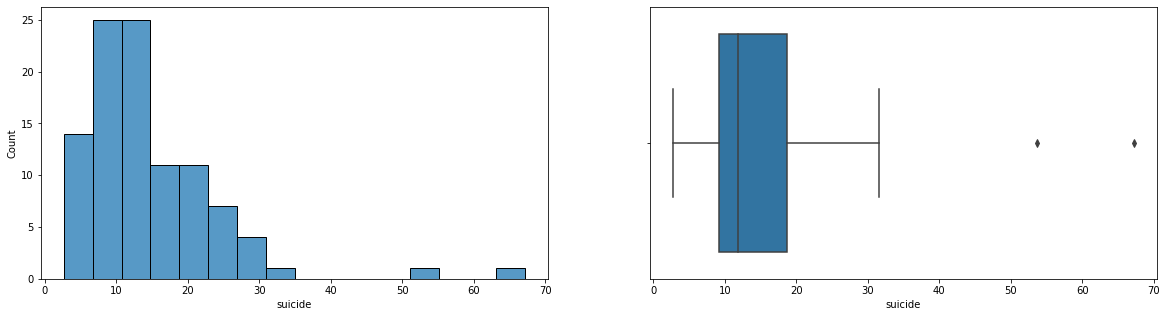

In [69]:
dataset_num = dataset.select_dtypes(exclude=object)
for col in dataset_num.columns:
    fig, ax = plt.subplots(1, 2, figsize=(20,5))
    sns.histplot(data=dataset_num, x=col, ax=ax[0])
    sns.boxplot(data=dataset_num, x=col, ax=ax[1])

In [21]:
dataset_num

,yr,age,sex,alcohol,drunkard,obese,drug,parents_fights,bunk,had_sex,smoker,had_fights,bullied,accident,alone,suicide
0,2012,0,0,49.3,28.9,35.9,10.6,46.2,32.0,43.5,17.0,44.2,42.1,24.8,6.1,12.9
1,2012,0,1,50.7,26.8,21.8,6.5,49.9,29.4,30.7,20.5,24.7,25.2,24.2,4.3,18.9
2,2016,0,0,38.0,19.3,12.7,0.8,35.7,18.8,31.8,5.1,32.1,47.4,48.4,10.8,14.4
3,2016,0,1,42.4,16.8,18.3,0.2,39.7,6.5,14.2,1.3,27.3,51.5,40.4,14.2,9.6
4,2016,1,0,46.5,29.6,3.3,2.1,33.3,17.3,35.7,6.9,28.8,43.3,51.0,9.7,13.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2011,0,1,5.8,4.7,13.6,1.9,20.2,44.6,8.4,8.2,41.8,66.5,57.4,14.3,19.5
96,2015,0,0,32.2,35.5,60.5,4.0,36.3,32.7,32.0,25.7,48.7,30.2,51.2,4.1,14.7
97,2015,0,1,24.4,27.1,63.0,2.0,36.3,16.2,13.6,29.9,22.9,30.9,41.7,3.3,16.9
98,2015,1,0,48.3,53.7,57.8,10.1,36.5,38.9,55.7,40.0,49.6,23.6,54.5,7.3,9.0


#### Bivariate Analysis

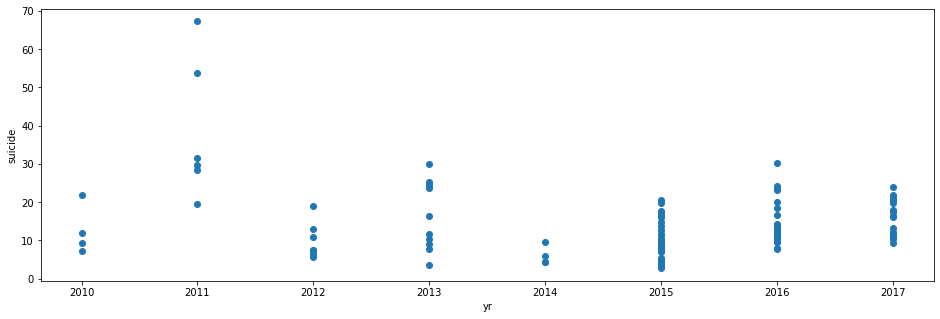

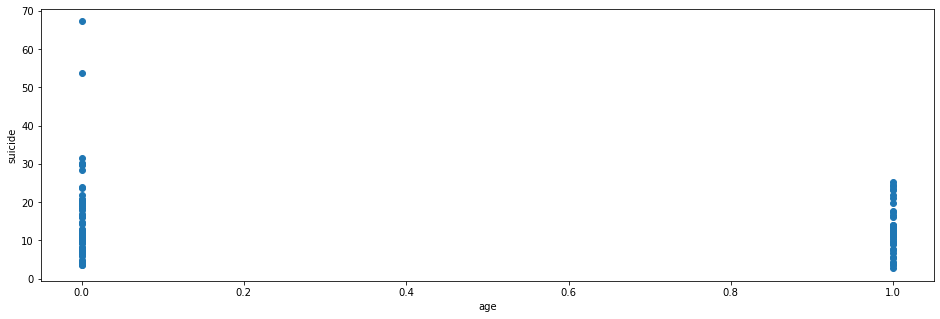

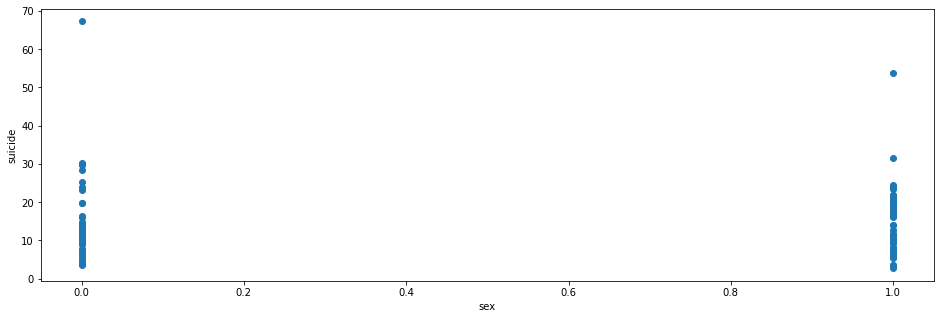

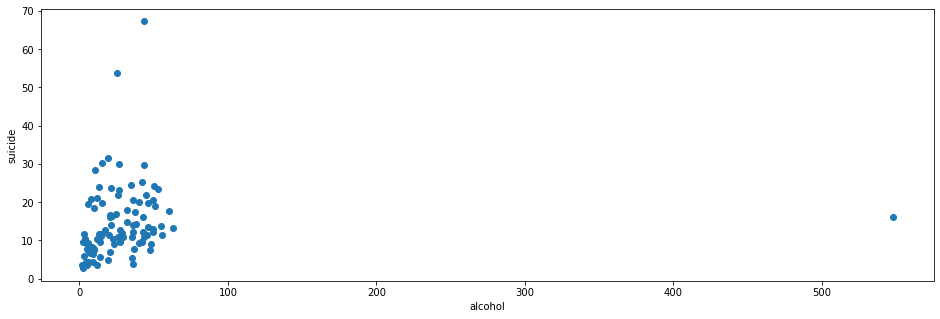

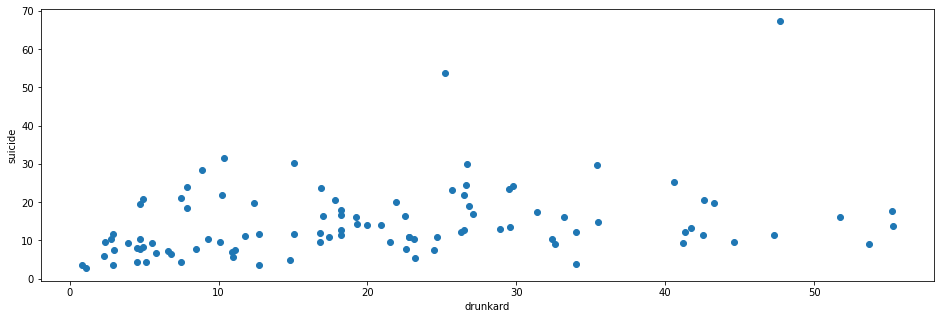

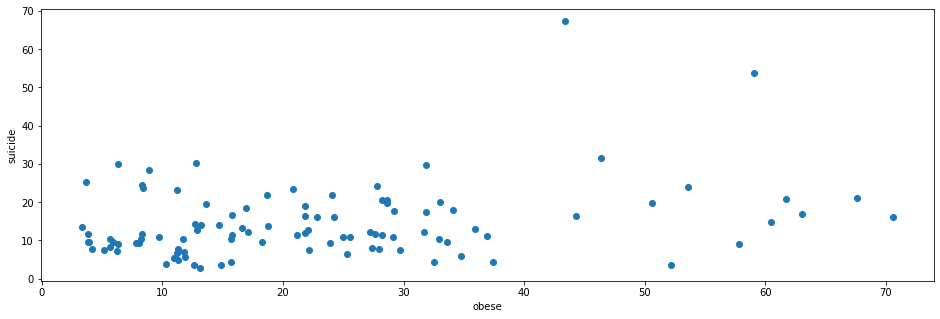

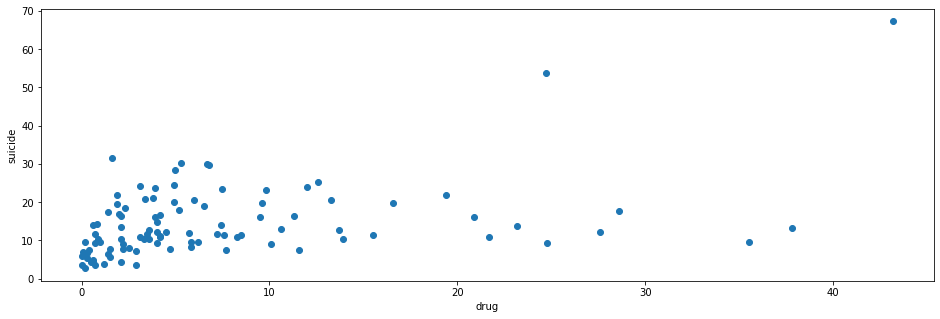

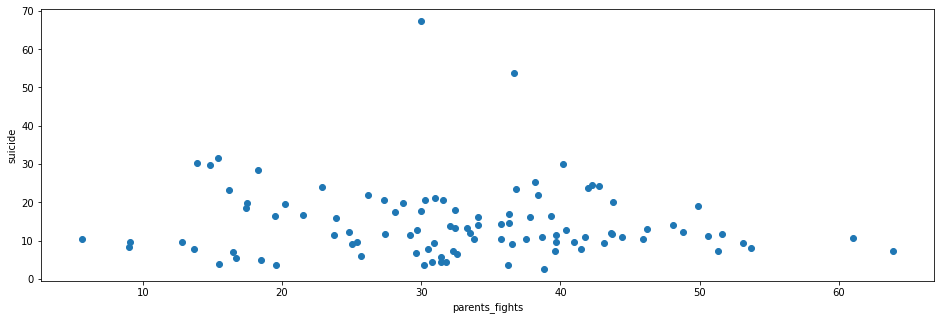

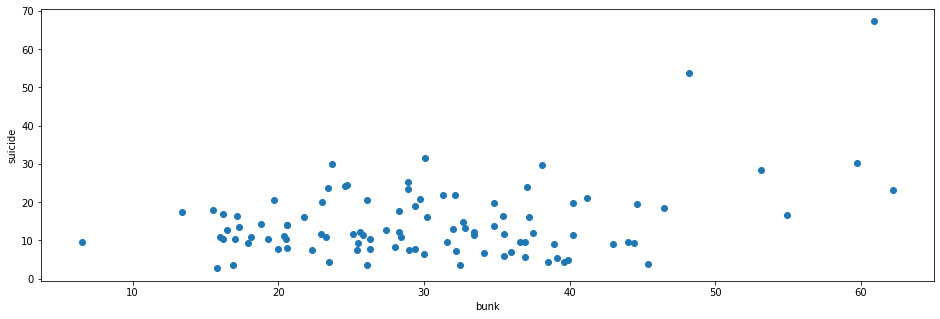

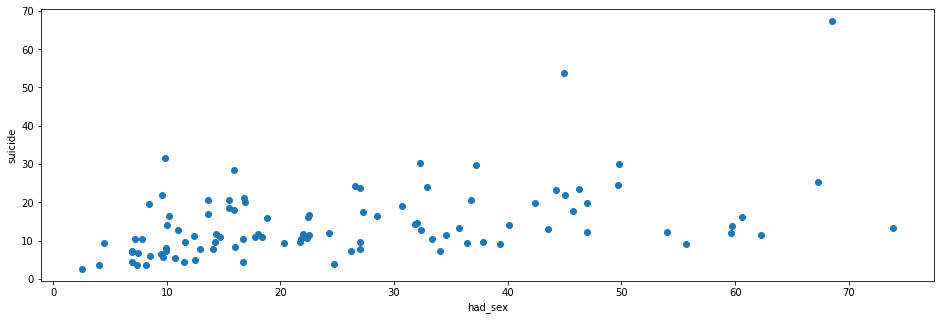

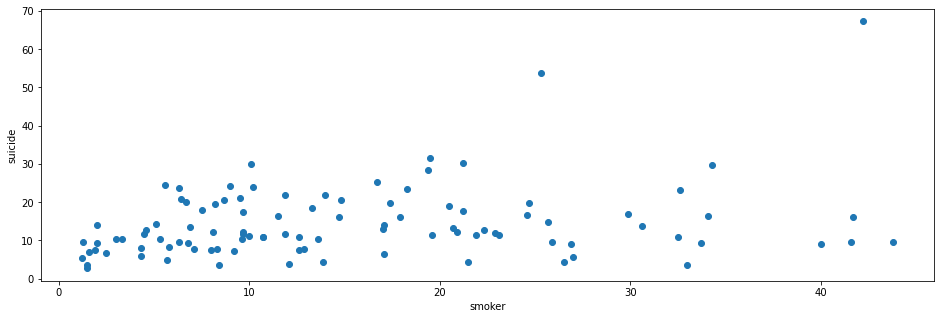

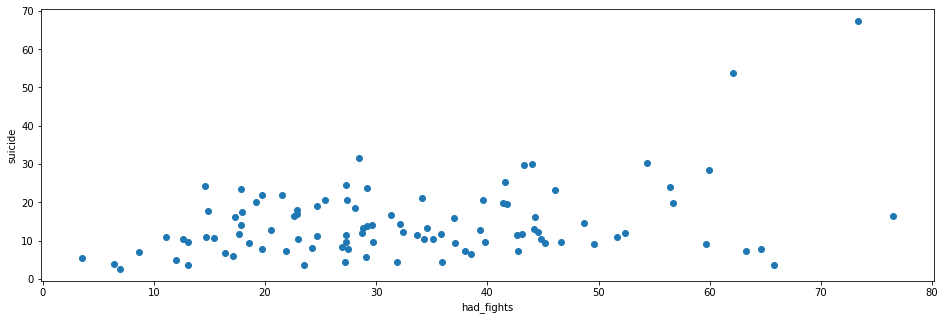

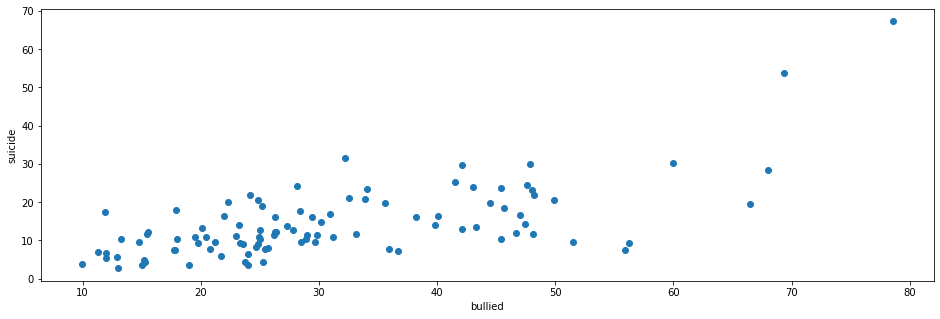

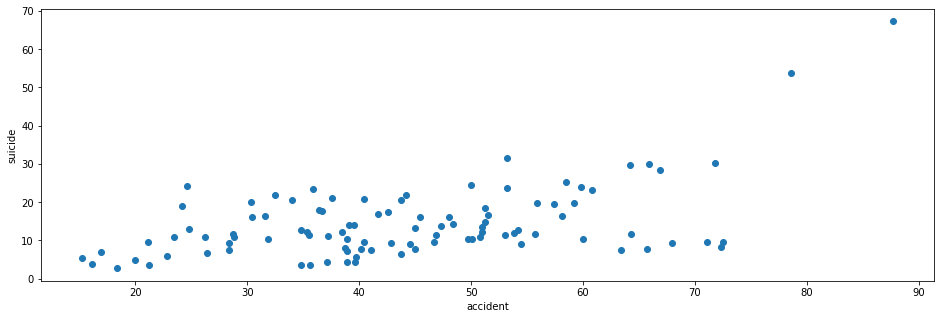

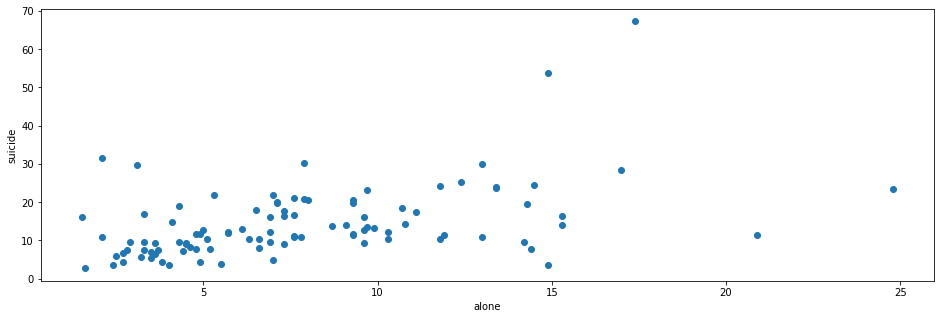

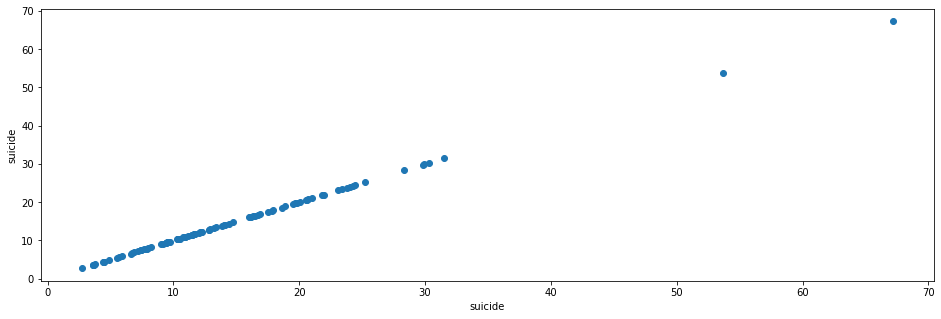

In [22]:
for col in dataset_num.columns:
    fig, ax = plt.subplots(1,figsize=(16,5))
    plt.scatter(dataset[col], dataset['suicide'])
    plt.xlabel(col)
    plt.ylabel('suicide')

All of our numerical variables have a moderate to slightly strong positive relationship 
   with the class label suicide which
   indicates that all these variables do have a significant effect on the rate of suicide attempts. 

### Pearson Correlation 

<AxesSubplot:>

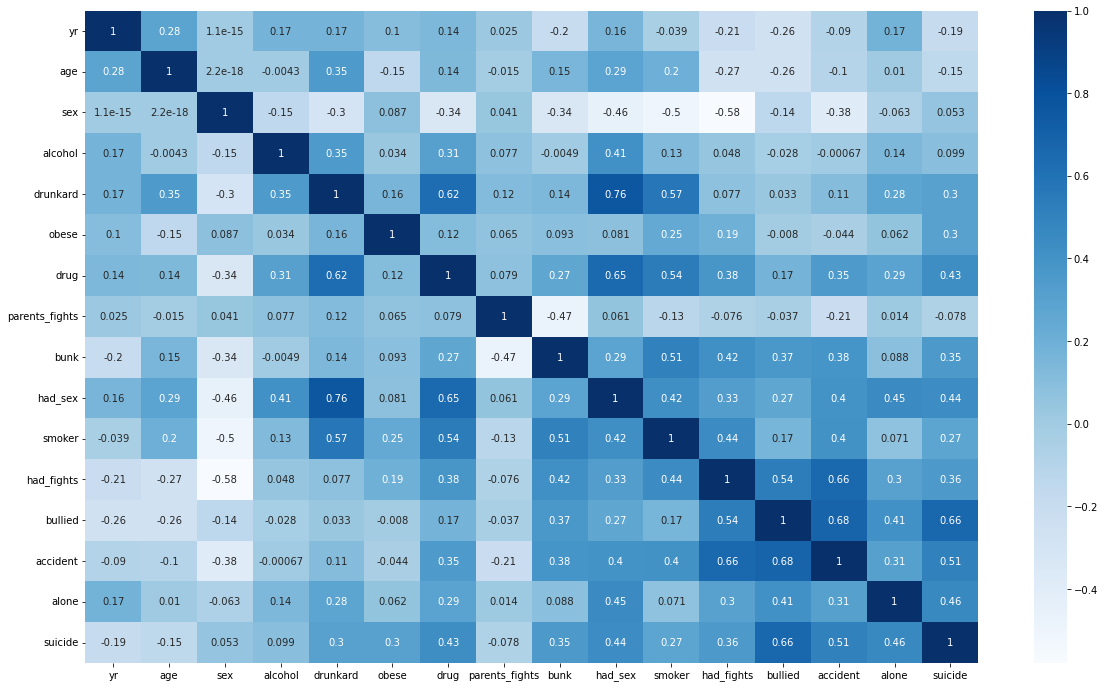

In [24]:
plt.figure(figsize=(20,12))
correlation = dataset.corr(method='pearson')
sns.heatmap(correlation,annot=True,cmap = 'Blues')

In [25]:
correlation

,yr,age,sex,alcohol,drunkard,obese,drug,parents_fights,bunk,had_sex,smoker,had_fights,bullied,accident,alone,suicide
yr,1.000000e+00,2.793014e-01,1.117936e-15,0.171543,0.173470,0.100181,0.139145,0.024895,-0.199816,0.155110,-0.039194,-0.214888,-0.263084,-0.089851,0.173593,-0.189087
age,2.793014e-01,1.000000e+00,2.249425e-18,-0.004343,0.349917,-0.149526,0.135534,-0.015075,0.152908,0.290520,0.204126,-0.270345,-0.262723,-0.100236,0.010049,-0.145582
sex,1.117936e-15,2.249425e-18,1.000000e+00,-0.148108,-0.300334,0.086755,-0.338082,0.041143,-0.336530,-0.455041,-0.500058,-0.578831,-0.140152,-0.384483,-0.063345,0.053177
alcohol,1.715427e-01,-4.342974e-03,-1.481075e-01,1.000000,0.348566,0.034048,0.307827,0.077462,-0.004900,0.411886,0.128407,0.048052,-0.028102,-0.000669,0.140255,0.099006
drunkard,1.734695e-01,3.499170e-01,-3.003340e-01,0.348566,1.000000,0.161077,0.624900,0.118650,0.140044,0.763615,0.570963,0.076987,0.033170,0.111787,0.276148,0.298736
obese,1.001807e-01,-1.495256e-01,8.675455e-02,0.034048,0.161077,1.000000,0.116044,0.065477,0.092603,0.081378,0.246391,0.194235,-0.008007,-0.044277,0.061892,0.298063
drug,1.391452e-01,1.355336e-01,-3.380823e-01,0.307827,0.624900,0.116044,1.000000,0.078705,0.269544,0.649461,0.537644,0.379017,0.172866,0.347453,0.294782,0.429716
parents_fights,2.489546e-02,-1.507490e-02,4.114317e-02,0.077462,0.118650,0.065477,0.078705,1.000000,-0.473974,0.061028,-0.126714,-0.076031,-0.037204,-0.214949,0.013899,-0.077727
bunk,-1.998162e-01,1.529076e-01,-3.365299e-01,-0.004900,0.140044,0.092603,0.269544,-0.473974,1.000000,0.288123,0.509576,0.417968,0.365655,0.384924,0.087632,0.353052
had_sex,1.551095e-01,2.905205e-01,-4.550412e-01,0.411886,0.763615,0.081378,0.649461,0.061028,0.288123,1.000000,0.420603,0.329267,0.270741,0.398894,0.448615,0.438344


### All Features

In [26]:
X = dataset.drop(['country','suicide'],axis=1)
Y = dataset['suicide']
X_train,X_test ,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=20)

In [27]:
model = linear_model.LinearRegression()
model.fit(X,Y)
predictions = model.predict(X_test)
print("Train data size:", len(Y_train))
print("Test data size:",len(Y_test))
result = model.score(X_test, Y_test)
print("Accuracy: %.3f%%" % (result*100.0))

Train data size: 80
Test data size: 20
Accuracy: 56.598%


In [28]:
from sklearn.linear_model import Ridge
model = Ridge(alpha=1)
model.fit(X,Y)
predictions= model.predict(X_test)
result = model.score(X_test, Y_test)
print("Accuracy: %.3f%%" % (result*100.0))

Accuracy: 56.980%


In [29]:
from sklearn.linear_model import Lasso
model = Lasso(alpha=1)
model.fit(X,Y)
predictions= model.predict(X_test)
result = model.score(X_test, Y_test)
print("Accuracy: %.3f%%" % (result*100.0))

Accuracy: 49.334%


In [30]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor(random_state=0)
model.fit(X,Y)
predictions= model.predict(X_test)
result = model.score(X_test, Y_test)
print("Accuracy: %.3f%%" % (result*100.0))

Accuracy: 100.000%


In [31]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators = 100 ,random_state=0)
model.fit(X,Y)
predictions= model.predict(X_test)
result = model.score(X_test, Y_test)
print("Accuracy: %.3f%%" % (result*100.0))

Accuracy: 89.328%


In [32]:
from sklearn.svm import SVR
model = SVR()
model.fit(X,Y)
predictions= model.predict(X_test)
result = model.score(X_test, Y_test)
print("Accuracy: %.3f%%" % (result*100.0))

Accuracy: -5.183%


In [33]:
import sklearn.gaussian_process as gp
kernel = gp.kernels.ConstantKernel(1.0, (1e-1, 1e3)) * gp.kernels.RBF(10.0, (1e-3, 1e3))
model = gp.GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10, alpha=0.1, normalize_y=True)
model.fit(X,Y)
#params = model.kernel_.get_params()
predictions = model.predict(X_test, return_std=True)
result = model.score(X_test, Y_test)
print("Accuracy: %.3f%%" % (result*100.0))

Accuracy: 80.977%


In [ ]:
from pandas import MultiIndex
from xgboost import XGBRegressor
model = XGBRegressor()
model.fit(X,Y)
predictions = model.predict(X_test)
print("Train data size:", len(Y_train))
print("Test data size:",len(Y_test))
result = model.score(X_test, Y_test)
print("Accuracy: %.3f%%" % (result*100.0))

## HIGHLY CORRELATED FEATURES

In [35]:
#Correlation with output variable
cor_target = correlation['suicide'] 
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.4]
relevant_features

drug        0.429716
had_sex     0.438344
bullied     0.663891
accident    0.510078
alone       0.457475
suicide     1.000000
Name: suicide, dtype: float64

In [36]:
## inter correlation
Rele_feat = dataset[['drug','had_sex','bullied','accident','alone']]
corr_elation = Rele_feat.corr(method="pearson")    # Each are not that much correlated to each other
corr_elation

,drug,had_sex,bullied,accident,alone
drug,1.000000,0.649461,0.172866,0.347453,0.294782
had_sex,0.649461,1.000000,0.270741,0.398894,0.448615
bullied,0.172866,0.270741,1.000000,0.679644,0.410681
accident,0.347453,0.398894,0.679644,1.000000,0.309574
alone,0.294782,0.448615,0.410681,0.309574,1.000000


In [ ]:
X = dataset[['drug','had_sex','bullied','accident','alone']]
Y = dataset['suicide']
X_train,X_test ,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=20)

In [37]:
model = linear_model.LinearRegression()
model.fit(X,Y)
predictions = model.predict(X_test)
print("Train data size:", len(Y_train))
print("Test data size:",len(Y_test))
result = model.score(X_test, Y_test)
print("Accuracy: %.3f%%" % (result*100.0))

Train data size: 80
Test data size: 20
Accuracy: 56.598%


In [38]:
from sklearn.linear_model import Ridge
model = Ridge(alpha=1)
model.fit(X,Y)
predictions= model.predict(X_test)
result = model.score(X_test, Y_test)
print("Accuracy: %.3f%%" % (result*100.0))

Accuracy: 56.980%


In [39]:
from sklearn.linear_model import Lasso
model = Lasso(alpha=1)
model.fit(X,Y)
predictions= model.predict(X_test)
result = model.score(X_test, Y_test)
print("Accuracy: %.3f%%" % (result*100.0))

Accuracy: 49.334%


In [40]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor(random_state=0)
model.fit(X,Y)
predictions= model.predict(X_test)
result = model.score(X_test, Y_test)
print("Accuracy: %.3f%%" % (result*100.0))

Accuracy: 100.000%


In [41]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators = 100 ,random_state=0)
model.fit(X,Y)
predictions= model.predict(X_test)
result = model.score(X_test, Y_test)
print("Accuracy: %.3f%%" % (result*100.0))

Accuracy: 89.328%


In [42]:
from sklearn.svm import SVR
model = SVR()
model.fit(X,Y)
predictions= model.predict(X_test)
result = model.score(X_test, Y_test)
print("Accuracy: %.3f%%" % (result*100.0))

Accuracy: -5.183%


In [43]:
import sklearn.gaussian_process as gp
kernel = gp.kernels.ConstantKernel(1.0, (1e-1, 1e3)) * gp.kernels.RBF(10.0, (1e-3, 1e3))
model = gp.GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10, alpha=0.1, normalize_y=True)
model.fit(X,Y)
#params = model.kernel_.get_params()
predictions = model.predict(X_test, return_std=True)
result = model.score(X_test, Y_test)
print("Accuracy: %.3f%%" % (result*100.0))

Accuracy: 80.977%


In [44]:
from pandas import MultiIndex
from xgboost import XGBRegressor
model = XGBRegressor()
model.fit(X,Y)
predictions = model.predict(X_test)
print("Train data size:", len(Y_train))
print("Test data size:",len(Y_test))
result = model.score(X_test, Y_test)
print("Accuracy: %.3f%%" % (result*100.0))

Train data size: 80
Test data size: 20
Accuracy: 100.000%


C:\Users\deept\anaconda3\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\deept\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


### Diagnostic Analysis

Since we have numerical data that is highly affecting our class label Attempted_Suicide and our few categorical data, let us dive deep into the Root Cause Analysis .

**Q1 : Do overweight people get bullied more often based on country?**

In [58]:
dataset_num.groupby(['obese','bullied'])[['suicide']].mean().sort_values('suicide', ascending = False)

,,suicide
obese,bullied,
43.4,78.6,67.2
59.1,69.4,53.7
46.4,32.2,31.5
12.8,60.0,30.3
6.3,47.9,29.9
...,...,...
10.3,9.9,3.8
12.6,24.0,3.7
52.2,15.0,3.6


From the output, we can conclude that if someone has an overweight problem and got frequently bullied, there is a possibility that they will attempt suicide. In the reverse condition, when someone who has an overweight problem and not getting bullied. It is a small chance that they will be attempting suicide. Furthermore, these are the most cases that highlight the most suicidal cases around the world, as educated people we need to understand their problems and help them by not bullying them. Support them through thin and thick and from such small things like that, we can make their confidence goes up and make them settle very well in their life.

**Q2 : What age group of kids that had sexual relation attempted suicide?**

In [59]:
dataset.groupby(['age','had_sex'])[['suicide']].mean().sort_values('suicide', ascending = True)

suicide
age had_sex         
1   2.5          2.7
0   4.0          3.6
    8.2          3.6
1   7.4          3.7
    24.7         3.8
...              ...
0   49.8        29.9
    32.3        30.3
    9.8         31.5
    44.9        53.7
    68.5        67.2

[92 rows x 1 columns]

From the output, we can see that Age group of range 13-15 with higher sexual relation rate, attempted more suicide.

**Q3. Based on gender did they commit suicide if they had no friends?**

In [61]:
dataset.groupby(['sex','alone'])[['suicide']].mean().sort_values('suicide', ascending = True)

suicide
sex alone         
1   1.6       2.70
    2.4       3.60
0   4.0       3.70
    5.5       3.80
    3.8       4.40
...            ...
1   14.9     28.65
0   3.1      29.80
    13.0     29.90
    7.9      30.30
    17.4     67.20

[82 rows x 1 columns]

There is not much evidence to prove that the teens either males or females attempted suicides if they had no close friends.

**Q4. What gender of teens that were overweight attempted suicide?**

In [63]:
dataset.groupby(['sex','obese'])[['suicide']].mean().sort_values('suicide', ascending = True)

suicide
sex obese         
1   13.1       2.7
    52.2       3.6
    14.9       3.6
0   12.6       3.7
    10.3       3.8
...            ...
    31.9      29.8
    12.8      30.3
1   46.4      31.5
    59.1      53.7
0   43.4      67.2

[95 rows x 1 columns]

From the output, females who are overweight as compared to the ones who are not, attempted suicide more often.

**Q5. Attempted Suicide Rate by country based on Gender**

In [64]:
dataset.groupby(['sex','country'])[['suicide']].mean().sort_values('suicide', ascending = True)

suicide
sex country                        
1   Indonesia              3.150000
    Tuvalu                 3.600000
0   Indonesia              4.050000
    Laos                   4.350000
    Brunei Darussalam      4.500000
    Malaysia               6.150000
1   Laos                   6.200000
    Malaysia               7.050000
0   Uruguay                7.400000
1   Brunei Darussalam      7.750000
    Timor-Leste            8.000000
0   Mongolia               8.033333
    Nepal                  8.400000
    Timor-Leste            9.550000
1   Fiji Islands           9.600000
0   Suriname               9.700000
    Bhutan                10.300000
    Mauritus              10.450000
1   Mongolia              10.466667
    Uruguay               10.800000
    Nepal                 11.050000
0   Trinidad and Tobago   11.300000
1   Thailand              11.650000
0   Wallis and Futuna     11.850000
1   Benin                 11.850000
0   Peru                  12.000000
1   Bhutan                12.150000
0   Fiji Islands          12.200000
    Dominican Republic    12.200000
    Argentina             12.900000
1   Mauritus              13.700000
0   Thailand              13.750000
    Benin                 13.900000
    Jamaica               14.650000
    Tuvalu                16.300000
1   Wallis and Futuna     16.550000
0   Seychelles            16.850000
1   Suriname              17.150000
    Trinidad and Tobago   17.700000
    Vanuatu               18.266667
    Argentina             18.900000
    Seychelles            19.150000
    Jamaica               21.200000
    Peru                  22.000000
    Dominican Republic    22.200000
    Namibia               24.100000
0   Vanuatu               27.233333
    Namibia               27.550000
    Kiribati              29.800000
1   Kiribati              31.500000
    Samoa                 31.800000
0   Samoa                 36.966667

On a general note, we see that be it any country, female teens attempted more suicides than male teens.

**Did teens had understanding parents if they less or more fights?**

In [65]:
dataset.groupby(['had_fights','parents_fights'])[['suicide']].mean().sort_values('suicide', ascending = True)

,,suicide
had_fights,parents_fights,
7.0,38.8,2.7
13.1,36.2,3.6
65.8,19.6,3.6
23.5,30.2,3.7
6.4,15.5,3.8
...,...,...
44.0,40.2,29.9
54.4,13.9,30.3
28.5,15.4,31.5


On a general note we see that teens having less fights had more understanding parents than those who had more fights.